In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 23)

In [3]:
TS=pd.read_csv('TSLA.csv',index_col='Date')

In [4]:
HY=pd.read_csv('HYMTF.csv',index_col='Date')

In [5]:
KIA=pd.read_csv('000270.KS.csv',index_col='Date')

In [6]:
BMW=pd.read_csv('BMW.DE.csv',index_col='Date')

In [7]:
MCB=pd.read_csv('MBG.DE.csv',index_col='Date')

In [8]:
tickers=['TS','HY','KIA','BMW','MCB']

In [9]:
TS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000
2021-12-29,366.213318,368.000000,354.713318,362.063324,362.063324,56154000
2021-12-30,353.776672,365.183319,351.049988,356.779999,356.779999,47040900
2021-12-31,357.813324,360.666656,351.529999,352.260010,352.260010,40733700


In [10]:
TS["Daily Return"] = TS["Adj Close"].pct_change(1)
HY["Daily Return"] = HY["Adj Close"].pct_change(1)
KIA["Daily Return"] = KIA["Adj Close"].pct_change(1)
BMW["Daily Return"] = BMW["Adj Close"].pct_change(1)
MCB["Daily Return"] = MCB["Adj Close"].pct_change(1)

In [11]:
TS=TS.dropna()
HY=HY.dropna()
KIA=KIA.dropna()
BMW=BMW.dropna()
MCB=MCB.dropna()

In [12]:
tickers = ['TS', 'HY', 'KIA', 'BMW', 'MCB']

In [13]:
car_stocks=pd.concat([TS,HY,KIA,BMW,MCB],axis=1,keys=tickers)

In [14]:
car_stocks.columns.names = ['Car Ticker','Stock Info']

In [15]:
car_stocks.head()

Car Ticker          TS                                                  \
Stock Info        Open        High         Low       Close   Adj Close   
Date                                                                     
2021-12-28  369.829987  373.000000  359.473328  362.823334  362.823334   
2021-12-29  366.213318  368.000000  354.713318  362.063324  362.063324   
2021-12-30  353.776672  365.183319  351.049988  356.779999  356.779999   
2021-12-31  357.813324  360.666656  351.529999  352.260010  352.260010   
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   

Car Ticker                                   HY                        ...  \
Stock Info       Volume Daily Return       Open       High        Low  ...   
Date                                                                   ...   
2021-12-28   60324000.0    -0.005000  42.000000  42.000000  42.000000  ...   
2021-12-29   56154000.0    -0.002095  41.509998  41.990002  41.500000  ...   
2021-12-30   47040900.0    -0.014592  41.000000  41.000000  40.099998  ...   
2021-12-31   40733700.0    -0.012669  40.099998  41.250000  40.099998  ...   
2022-01-03  103931400.0     0.135317  41.099998  41.220001  40.849998  ...   

Car Ticker        BMW                               MCB                        \
Stock Info  Adj Close    Volume Daily Return       Open       High        Low   
Date                                                                            
2021-12-28  83.607788  442096.0    -0.000556  69.930000  70.540001  69.489998   
2021-12-29  82.910675  419820.0    -0.008338  69.599998  69.750000  68.180000   
2021-12-30  82.250732  598323.0    -0.007960  68.239998  68.589996  67.589996   
2021-12-31        NaN       NaN          NaN        NaN        NaN        NaN   
2022-01-03  84.890495  983398.0     0.032094  68.500000  69.190002  67.889999   

Car Ticker                                                
Stock Info      Close  Adj Close     Volume Daily Return  
Date                                                      
2021-12-28  69.599998  64.413712  1494742.0    -0.004149  
2021-12-29  68.230003  63.145802  2470115.0    -0.019684  
2021-12-30  67.589996  62.553486  2237979.0    -0.009380  
2021-12-31        NaN        NaN        NaN          NaN  
2022-01-03  68.699997  63.580772  2654611.0     0.016423  

[5 rows x 35 columns]

In [16]:
#What is the max Close price for each car's stock throughout the time period?**
car_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Car Ticker
TS       399.926666
HY        42.490002
KIA    86700.000000
BMW       99.320000
MCB       76.059998
dtype: float64

In [17]:
returns = pd.DataFrame()

In [18]:
for tick in tickers:
    returns[tick+' Return'] = car_stocks[tick]['Close'].pct_change()
returns.head().dropna()

,TS Return,HY Return,KIA Return,BMW Return,MCB Return
Date,,,,,
2021-12-29,-0.002095,-0.010714,-0.013018,-0.008338,-0.019684
2021-12-30,-0.014592,-0.025271,-0.014388,-0.007960,-0.009380
2021-12-31,-0.012669,0.009136,0.000000,0.000000,0.000000
2022-01-03,0.135317,-0.000489,0.000000,0.032094,0.016423


In [19]:
import seaborn as sns

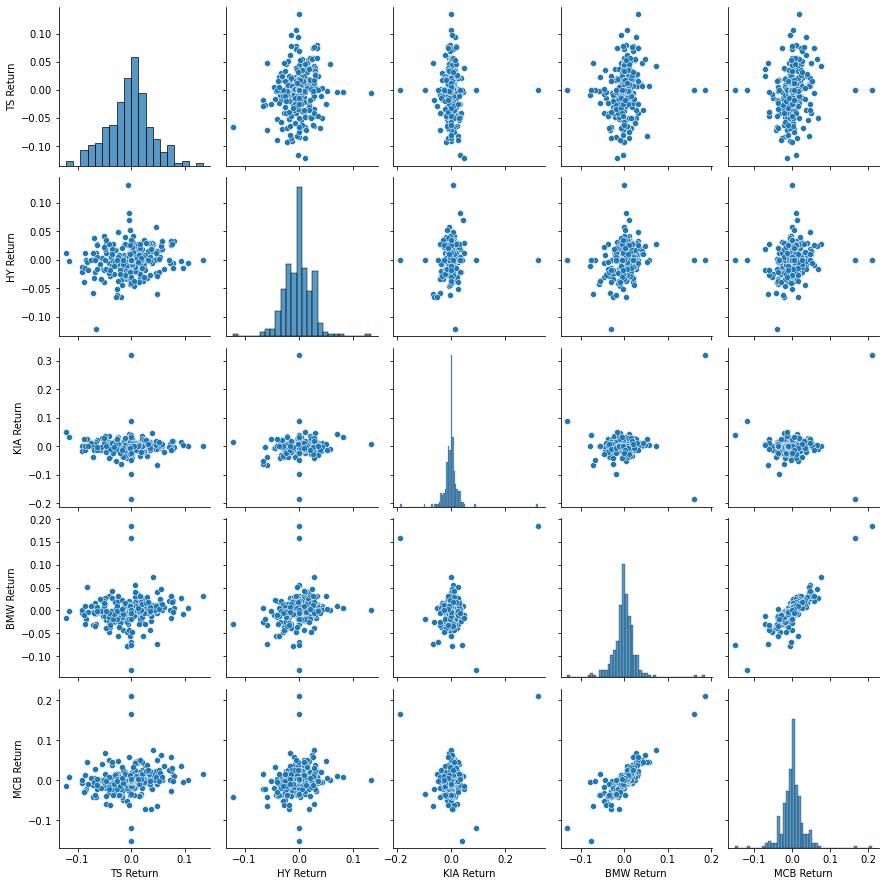

In [20]:
sns.pairplot(returns[1:])

In [21]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

TS Return     2022-04-26
HY Return     2022-07-11
KIA Return    2022-11-24
BMW Return    2022-05-30
MCB Return    2022-07-04
dtype: object

In [22]:
returns.idxmax()

TS Return     2022-01-03
HY Return     2022-07-12
KIA Return    2022-01-17
BMW Return    2022-01-17
MCB Return    2022-01-17
dtype: object

In [23]:
returns.std() 

TS Return     0.040448
HY Return     0.025743
KIA Return    0.030085
BMW Return    0.027622
MCB Return    0.031569
dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

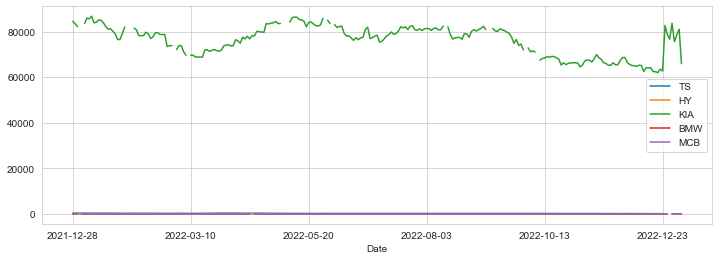

In [28]:
for tick in tickers:
    car_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

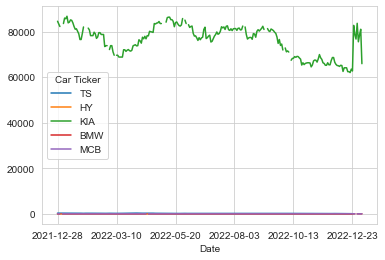

In [26]:
car_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

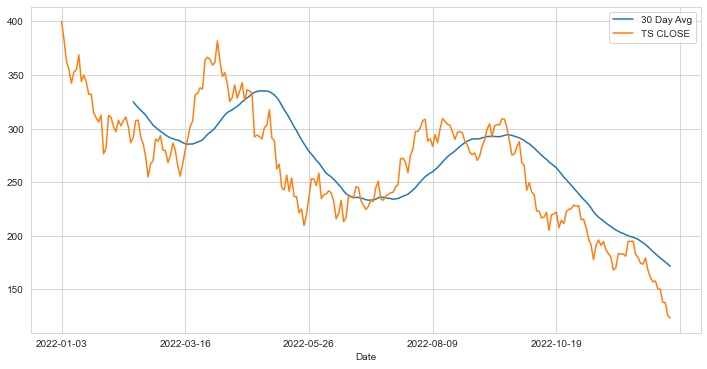

In [32]:
plt.figure(figsize=(12,6))
TS['Close']['2022-01-01':'2022-12-23'].rolling(window=30).mean().plot(label='30 Day Avg')
TS['Close']['2022-01-01':'2022-12-23'].plot(label='TS CLOSE')
plt.legend()

<AxesSubplot:xlabel='Car Ticker', ylabel='Car Ticker'>

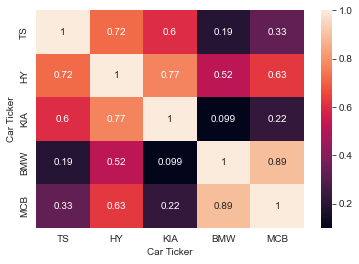

In [33]:
sns.heatmap(car_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

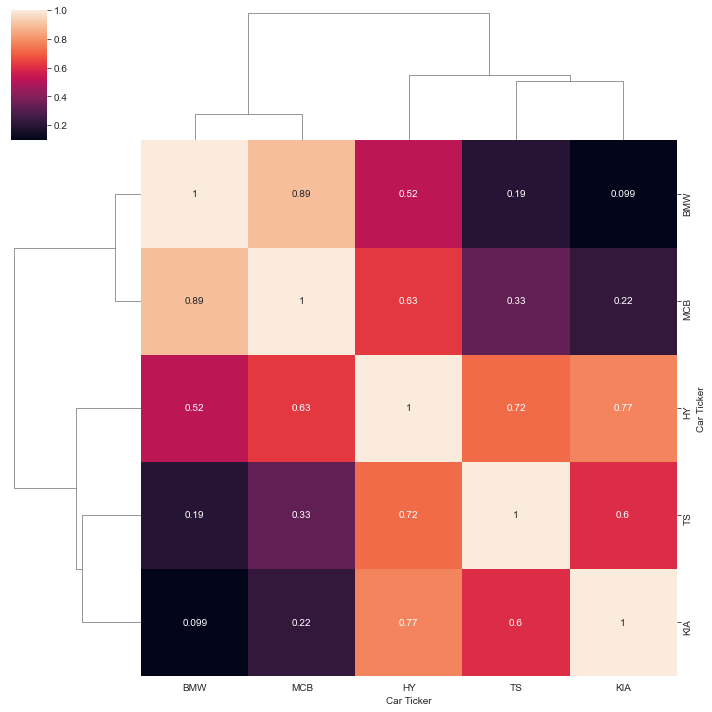

In [34]:
sns.clustermap(car_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [35]:
close_corr = car_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [39]:
TS[['Open', 'High', 'Low', 'Close']]['2022-01-01':'2022-12-23'].iplot(kind='candle')


In [40]:
TS['Close']['2022-01-01':'2022-12-23'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [42]:
TS['Close']['2022-01-01':'2022-12-23'].ta_plot(study='boll')